<a href="https://colab.research.google.com/github/klundquist/scTCR-project/blob/main/fig1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scirpy==0.16.1 scanpy matplotlib muon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.7/293.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.6/651.6 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━

In [ ]:
# 1. Setup: Imports, download, load full Wu2020

import os
import muon as mu
import numpy as np
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2

use_3k = False  # Use full dataset, not just 3k
file_path = "data/wu2020.h5mu"

if os.path.exists(file_path):
    print("Loading full wu2020 dataset from disk...")
    mdata = mu.read(file_path)
else:
    print("Downloading full wu2020 dataset...")
    mdata = ir.datasets.wu2020()
    os.makedirs("data", exist_ok=True)
    mdata.write(file_path)
print(mdata)

100%|████████████████████████████████████████| 594M/594M [00:00<00:00, 567GB/s]
/usr/local/lib/python3.12/dist-packages/anndata/utils.py:362: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=Fal

MuData object with n_obs × n_vars = 161015 × 30727
  2 modalities
    gex:	141623 x 30727
      obs:	'cluster_orig', 'patient', 'sample', 'source'
      uns:	'cluster_orig_colors'
      obsm:	'X_umap_orig'
    airr:	123134 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'


/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [ ]:
# 2. QC/filter

sc.pp.filter_genes(mdata["gex"], min_cells=10)
sc.pp.filter_cells(mdata["gex"], min_genes=100)
sc.pp.normalize_per_cell(mdata["gex"])
sc.pp.log1p(mdata["gex"])
sc.pp.highly_variable_genes(mdata["gex"], flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(mdata["gex"])
sc.pp.neighbors(mdata["gex"])
# Removed mdata.update() here as it seems to be causing issues with the airr modality

filtered out 1 genes that are detected in less than 10 cells
normalizing by total count per cell


/tmp/ipython-input-1727565638.py:5: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(mdata["gex"])
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:591: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(


    finished (0:00:01): normalized adata.X and added
    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:19)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:33)


In [ ]:
# Step 3: TCR chain QC, clonotype assignment with proper filtering and syncing


# Index chains and assign primary/secondary chains per cell
ir.pp.index_chains(mdata)

# Quality control on chains
ir.tl.chain_qc(mdata)

# Filter out 'multichain', 'orphan VDJ', and 'orphan VJ' cells in a single step
# Filter the airr modality's AnnData object
airr_filtered = mdata["airr"][
    ~np.isin(mdata["airr"].obs["chain_pairing"], ["multichain", "orphan VDJ", "orphan VJ"])
].copy()

# Update the mdata object with the filtered airr modality
mdata.mod["airr"] = airr_filtered

mdata.update()  # Synchronize after filtering

# Compute nucleotide sequence identity distances
ir.pp.ir_dist(mdata)

# Define clonotypes with full receptor arms, ignoring dual receptors beyond primary pairs
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

# Print updated MuData info to confirm filtering and annotation
print(mdata)

Filtering chains...
Indexing VJ chains...
Indexing VDJ chains...
build result array
Stored result in `mdata.obs["airr:receptor_type"]`.
Stored result in `mdata.obs["airr:receptor_subtype"]`.
Stored result in `mdata.obs["airr:chain_pairing"]`.


/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


  0%|          | 0/35577 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:clone_id"]`.
Stored result in `mdata.obs["airr:clone_id_size"]`.
MuData object with n_obs × n_vars = 156013 × 18291
  2 modalities
    gex:	141396 x 18291
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'X_umap_orig', 'X_pca'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	82046 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id'
      obsm:	'airr', 'chain_indices'


In [ ]:
# 4. Merge cell metadata

mdata.update()
gex_obs = mdata.mod["gex"].obs
airr_obs = mdata.mod["airr"].obs
merged_obs = gex_obs.join(airr_obs, how="inner")  # index: cell barcodes

/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


/tmp/ipython-input-192352402.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(['clonotype_orig', 'source']).size().unstack(fill_value=0)
/tmp/ipython-input-192352402.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(['clonotype_orig', 'source']).size().unstack(fill_value=0)
/tmp/ipython-input-192352402.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.gr

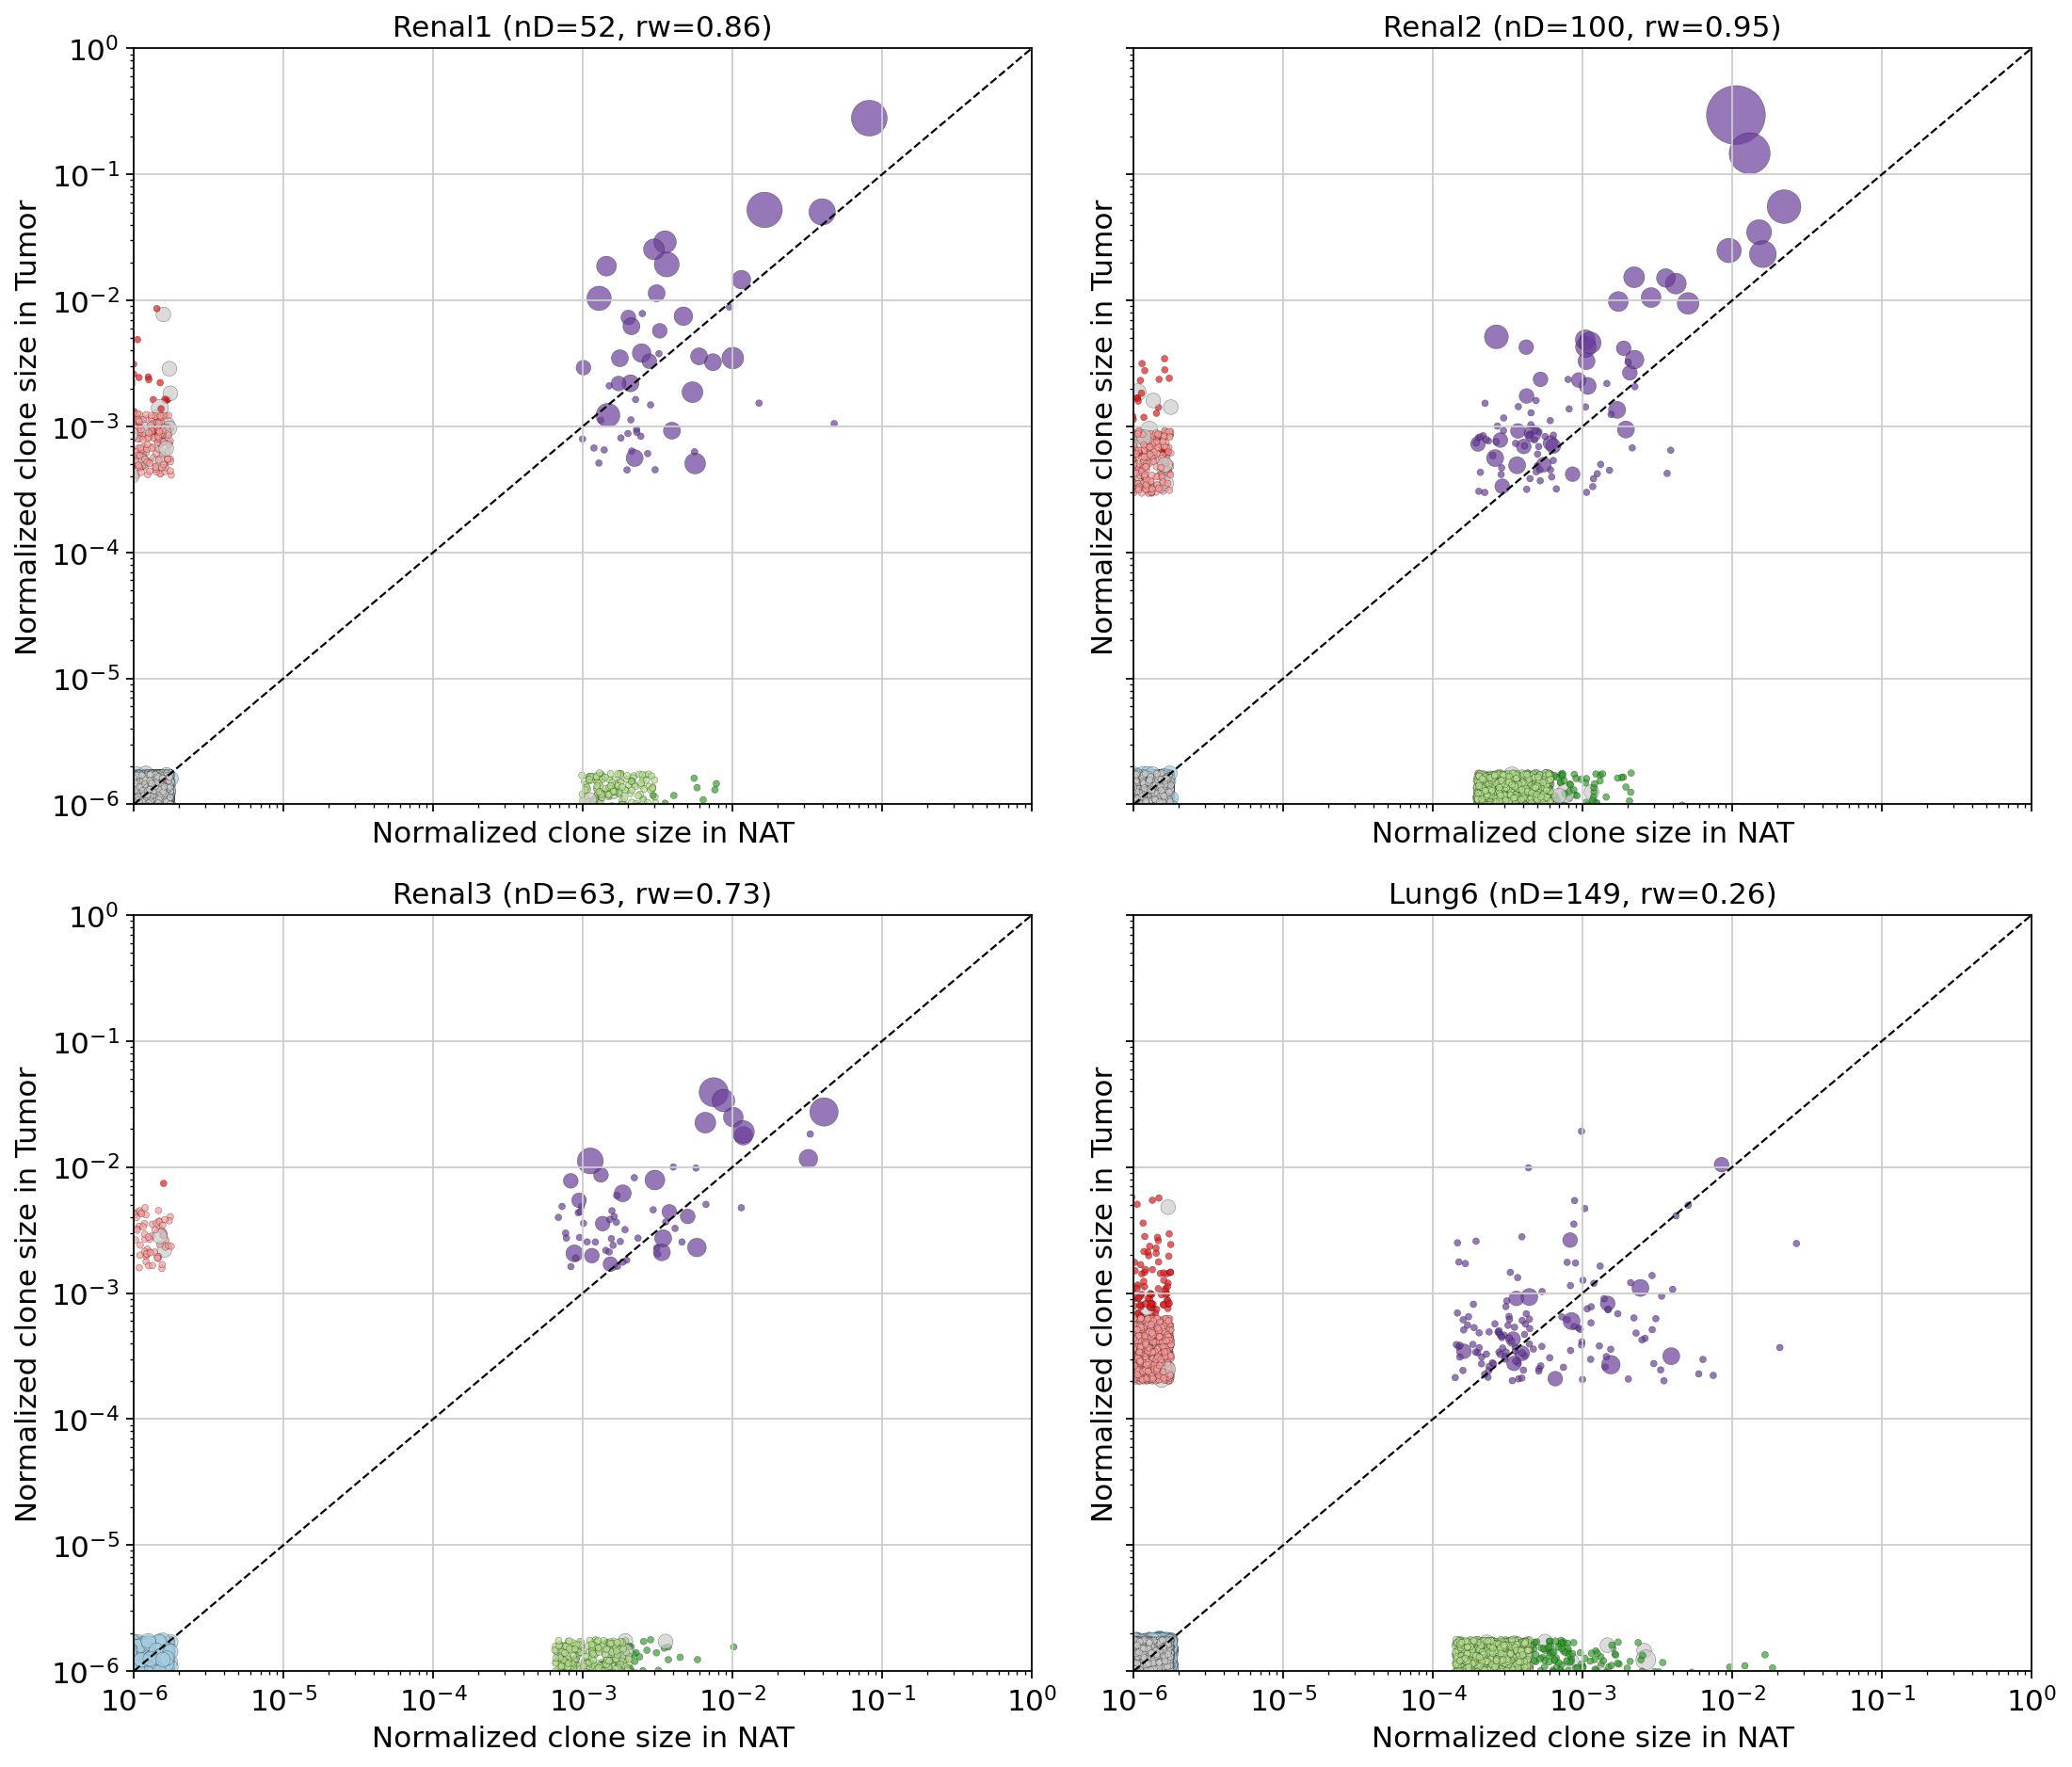

/tmp/ipython-input-192352402.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


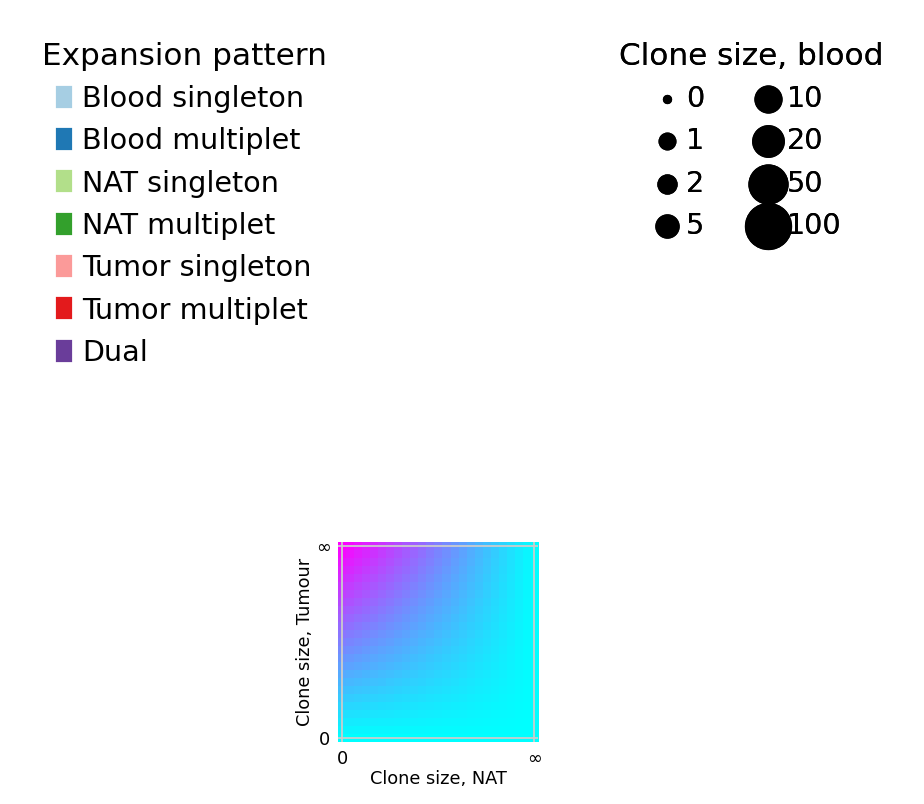

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ----------------------------
# Parameters
# ----------------------------
patients_to_plot = ["Renal1", "Renal2", "Renal3", "Lung6"]

PALETTE = {
    "Blood_singleton": "#a6cee3",   # light blue
    "Blood_multiplet": "#1f78b4",   # dark blue
    "NAT_singleton": "#b2df8a",     # light green
    "NAT_multiplet": "#33a02c",     # dark green
    "Tumor_singleton": "#fb9a99",   # light pink
    "Tumor_multiplet": "#e31a1c",   # dark red
    "Dual": "#6a3d9a",              # purple
    "Other": "#cccccc"              # gray (catch-all)
}

# Scaling constants
s_min = 10
s_scale = 40
alpha_pts = 0.7
jitter_decades = 0.25   # jitter width in log10 space
min_frac = 1e-6         # much lower cutoff to show singletons

# ----------------------------
# Expansion category function
# ----------------------------
def expansion_category(n, t, b):
    if b == 1 and n == 0 and t == 0: return "Blood_singleton"
    if b > 1 and n == 0 and t == 0: return "Blood_multiplet"
    if n == 1 and t == 0 and b == 0: return "NAT_singleton"
    if n > 1 and t == 0 and b == 0: return "NAT_multiplet"
    if t == 1 and n == 0 and b == 0: return "Tumor_singleton"
    if t > 1 and n == 0 and b == 0: return "Tumor_multiplet"
    if n > 0 and t > 0: return "Dual"
    return "Other"

# ----------------------------
# Main scatter panels
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)

for idx, patient in enumerate(patients_to_plot):
    data = merged_obs[merged_obs['patient'] == patient].copy()

    # count clonotypes across sources
    counts = data.groupby(['clonotype_orig', 'source']).size().unstack(fill_value=0)
    for col in ['NAT', 'Tumor', 'Blood']:
        if col not in counts.columns:
            counts[col] = 0
    counts = counts[['NAT', 'Tumor', 'Blood']].copy()

    nat_total   = int((data['source'] == 'NAT').sum())
    tumor_total = int((data['source'] == 'Tumor').sum())

    counts['NAT_frac']   = np.where(nat_total   > 0, counts['NAT']   / nat_total,   0.0)
    counts['Tumor_frac'] = np.where(tumor_total > 0, counts['Tumor'] / tumor_total, 0.0)
    counts['NAT_frac_plot']   = np.clip(counts['NAT_frac'].values,   min_frac, 1.0)
    counts['Tumor_frac_plot'] = np.clip(counts['Tumor_frac'].values, min_frac, 1.0)

    # Categories & sizes
    counts['Category'] = [expansion_category(n, t, b) for n, t, b in counts[['NAT','Tumor','Blood']].itertuples(index=False)]
    counts['Color']    = counts['Category'].map(PALETTE)
    counts['size']     = s_min + s_scale * np.sqrt(counts['Blood'].values)

    # Jitter in log space
    logx = np.log10(counts['NAT_frac_plot'].values)
    logy = np.log10(counts['Tumor_frac_plot'].values)
    logx += np.random.uniform(-jitter_decades, jitter_decades, size=len(logx))
    logy += np.random.uniform(-jitter_decades, jitter_decades, size=len(logy))
    x_plot, y_plot = 10**logx, 10**logy

    # Scatter
    ax = axes[idx // 2, idx % 2]
    ax.scatter(
        x_plot, y_plot,
        s=counts['size'].values,
        c=counts['Color'].values,
        edgecolor='k', linewidth=0.15,
        alpha=alpha_pts
    )

    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlim(min_frac, 1); ax.set_ylim(min_frac, 1)
    ax.plot([min_frac, 1], [min_frac, 1], 'k--', lw=1)
    ax.set_xlabel("Normalized clone size in NAT")
    ax.set_ylabel("Normalized clone size in Tumor")

    # Weighted correlation (Dual clones only)
    dual = counts[(counts['NAT'] > 0) & (counts['Tumor'] > 0)]
    if len(dual) > 1:
        x = np.log10(dual['NAT'].values.astype(float))
        y = np.log10(dual['Tumor'].values.astype(float))
        w = 1.0 + dual['Blood'].values.astype(float)
        xm, ym = np.average(x, weights=w), np.average(y, weights=w)
        num = np.sum(w * (x - xm) * (y - ym))
        den = np.sqrt(np.sum(w * (x - xm)**2) * np.sum(w * (y - ym)**2))
        rw = num / den if den > 0 else np.nan
        nD = len(dual)
        ax.set_title(f"{patient} (nD={nD}, rw={rw:.2f})")
    else:
        ax.set_title(patient)

plt.tight_layout()
plt.show()

# ----------------------------
# Separate legend figure
# ----------------------------
fig_leg, ax_leg = plt.subplots(figsize=(6, 5))
ax_leg.axis("off")

# Expansion categories
cat_handles = [
    mpatches.Patch(color=PALETTE[k], label=k.replace("_"," "))
    for k in ["Blood_singleton","Blood_multiplet",
              "NAT_singleton","NAT_multiplet",
              "Tumor_singleton","Tumor_multiplet","Dual"]
]
leg1 = ax_leg.legend(cat_handles, [h.get_label() for h in cat_handles],
                     title="Expansion pattern", loc="upper left", frameon=False)
ax_leg.add_artist(leg1)

# Blood clone size legend
blood_sizes = [0, 1, 2, 5, 10, 20, 50, 100]
size_handles = [plt.scatter([], [], s=s_min + s_scale*np.sqrt(v), color="k") for v in blood_sizes]
leg2 = ax_leg.legend(size_handles, list(map(str, blood_sizes)),
                     title="Clone size, blood", loc="upper right",
                     ncol=2, frameon=False)
ax_leg.add_artist(leg2)

# NAT × Tumor inset heatmap
inset_ax = fig_leg.add_axes([0.35, 0.05, 0.25, 0.25])  # relative to legend figure
g = np.outer(np.linspace(0, 1, 25), np.linspace(1, 0, 25))
inset_ax.imshow(g, cmap="cool", origin="lower")
inset_ax.set_xticks([0,24]); inset_ax.set_xticklabels(["0","∞"], fontsize=8)
inset_ax.set_yticks([0,24]); inset_ax.set_yticklabels(["0","∞"], fontsize=8)
inset_ax.set_xlabel("Clone size, NAT", fontsize=8, labelpad=1)
inset_ax.set_ylabel("Clone size, Tumour", fontsize=8, labelpad=1)
inset_ax.tick_params(axis='both', which='both', length=0)
for spine in inset_ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
